In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import linear_model
import seaborn as sb

%matplotlib inline

In [245]:
data = pd.read_csv('Assignment3.csv')
data.head()

,x1,x2,x3,x4,x5,y
0,7.11,-447.71,135.66,92.41,96.04,9131.40
1,7.06,-455.33,94.49,91.76,92.16,9001.86
2,6.89,-466.86,186.25,89.54,100.00,8595.85
3,7.25,-440.53,176.83,94.24,84.64,9469.94
4,7.24,-445.92,185.90,94.11,88.36,9448.98


# **TASK 1**


## **Fitting OLS on the data directly and evaluating the baseline SSE loss**

In [246]:
xx = np.array(data[['x1','x2', 'x3','x4','x5']])
yy = np.array(data.y)

In [247]:
def SSE(y, yhat):
    return np.sum((y-yhat)**2)

In [248]:
model = linear_model.LinearRegression()
model.fit(xx, yy)
ycap = model.predict(xx)
loss = SSE(yy, ycap)
print("Weights :", model.coef_, " Intercept :", model.intercept_)
print("Loss :",loss)

Weights : [-1.06736899e+03  1.00659916e-01 -5.71765977e-02  2.84363302e+02
  1.62848730e+00]  Intercept : -9655.31030895966
Loss : 71877.84134016866


### **SSE loss by OLS fit is 71877.84**

# **TASK 2**

In [249]:
data.describe()

,x1,x2,x3,x4,x5,y
count,101.00,101.00,101.00,101.00,101.00,101.00
mean,7.55,23.76,111.37,98.13,34.00,10244.46
std,0.38,292.85,55.81,4.94,30.56,1022.77
min,6.68,-466.86,9.80,86.83,0.00,8062.54
25%,7.25,-208.89,66.38,94.24,6.76,9469.94
50%,7.53,38.95,104.18,97.90,25.00,10187.66
75%,7.80,262.92,168.16,101.42,57.76,10866.63
max,8.37,546.88,195.81,108.85,100.00,12631.05


##**CORRELATION MATRIX**

In [250]:
corr = np.corrcoef(xx.T)
print(corr)

[[ 1.          0.70227559 -0.22369731  0.99997833 -0.00144945]
 [ 0.70227559  1.         -0.03260292  0.70319638  0.00261306]
 [-0.22369731 -0.03260292  1.         -0.22480781  0.08132155]
 [ 0.99997833  0.70319638 -0.22480781  1.         -0.00177718]
 [-0.00144945  0.00261306  0.08132155 -0.00177718  1.        ]]


In [251]:
print(corr > 0.9)

[[ True False False  True False]
 [False  True False False False]
 [False False  True False False]
 [ True False False  True False]
 [False False False False  True]]


In [252]:
yy = np.expand_dims(data['y'], 1)
all_data = np.concatenate((xx, yy), axis=1)
corr_all = np.corrcoef(all_data.T)
print(corr_all)

[[ 1.          0.70227559 -0.22369731  0.99997833 -0.00144945  0.9982136 ]
 [ 0.70227559  1.         -0.03260292  0.70319638  0.00261306  0.71670271]
 [-0.22369731 -0.03260292  1.         -0.22480781  0.08132155 -0.22026513]
 [ 0.99997833  0.70319638 -0.22480781  1.         -0.00177718  0.99826603]
 [-0.00144945  0.00261306  0.08132155 -0.00177718  1.          0.04660974]
 [ 0.9982136   0.71670271 -0.22026513  0.99826603  0.04660974  1.        ]]


In [253]:
print(corr_all > 0.7)

[[ True  True False  True False  True]
 [ True  True False  True False  True]
 [False False  True False False False]
 [ True  True False  True False  True]
 [False False False False  True False]
 [ True  True False  True False  True]]


## **DATA VISUALIZATION**


## **Visualizing the relationships between predictors and target variables using different techniques**

### **PAIR PLOT**

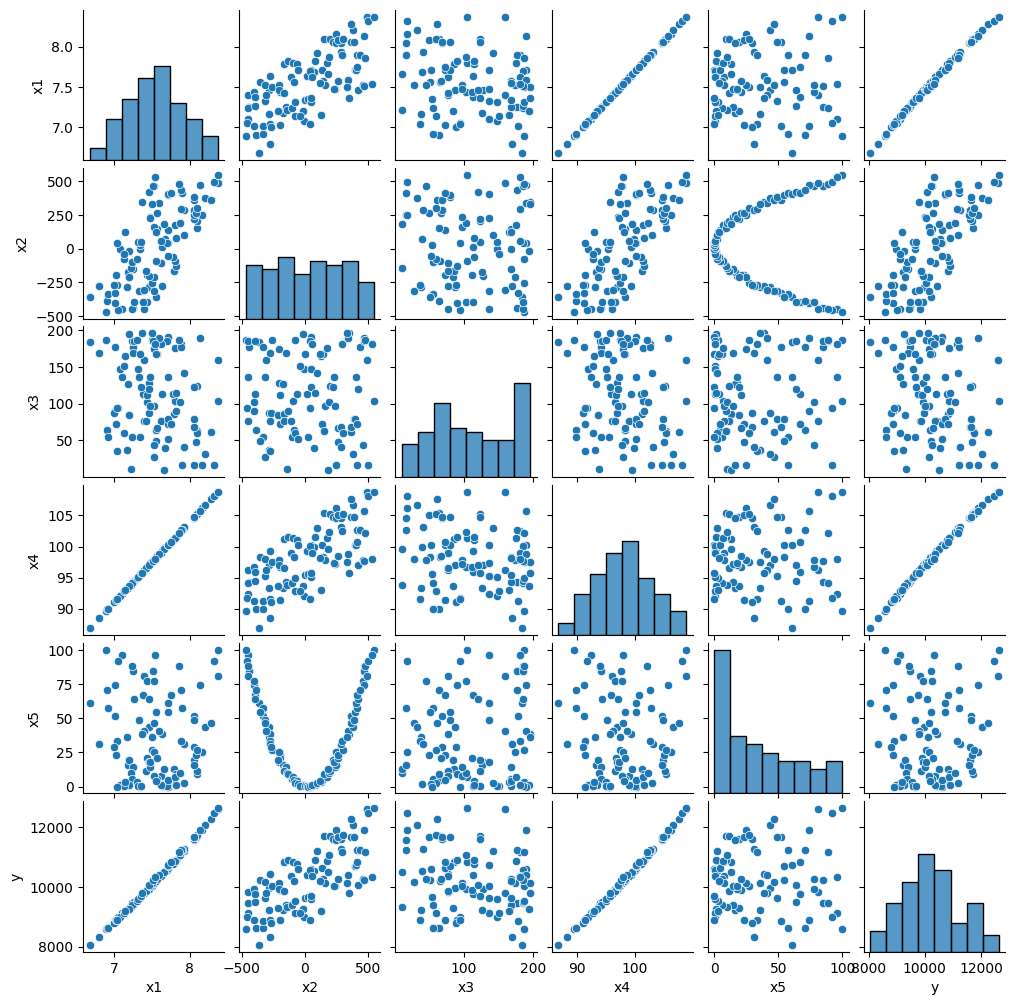

In [254]:
plot =sb.pairplot(data)
plot.fig.set_size_inches(10,10)

### **HEAT MAP**

Text(0.5, 1.0, 'Correlation Matrix')

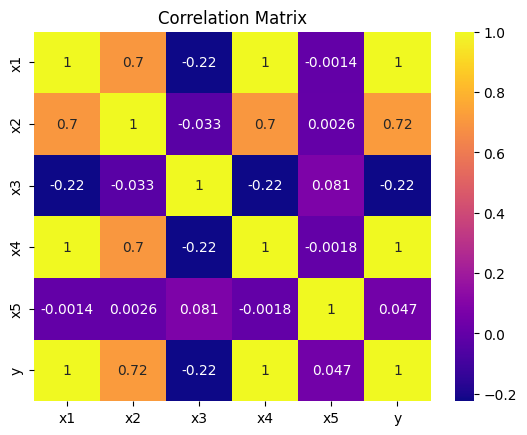

In [255]:
sb.heatmap(corr_all, annot=True, cmap='plasma', xticklabels=['x1','x2','x3','x4','x5','y'], yticklabels=['x1','x2','x3','x4','x5','y'])
plt.title('Correlation Matrix')

### **HISTOGRAM**

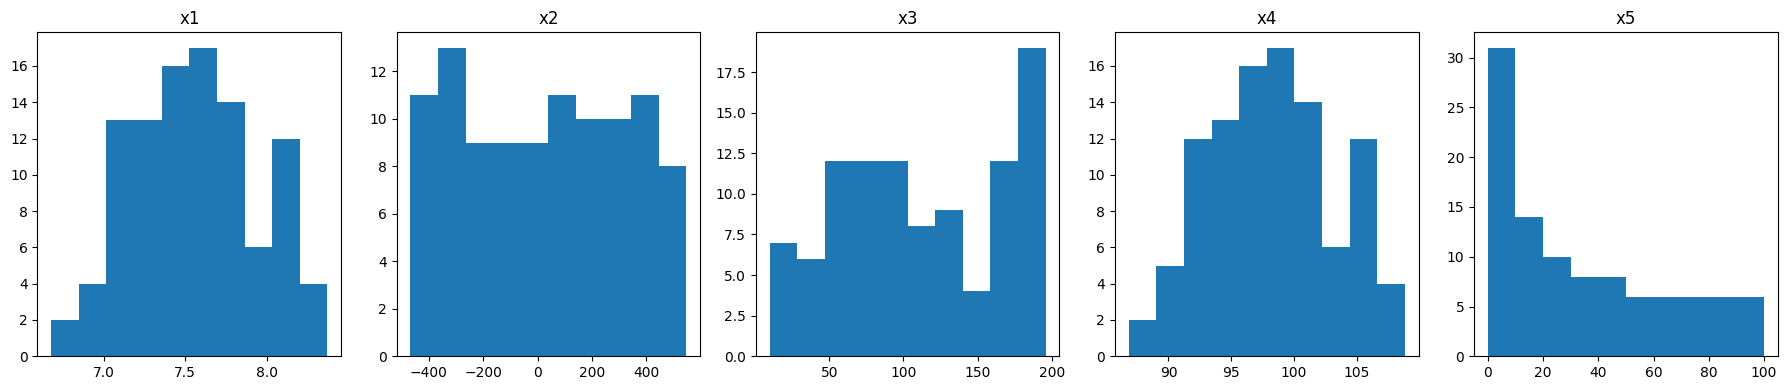

In [256]:
columns = ['x1', 'x2', 'x3', 'x4', 'x5']

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18, 4))

for i, col in enumerate(columns):
    data[col].hist(ax=axes[i], grid = False)
    axes[i].set_title(f"{col}")

plt.tight_layout()
plt.show()

## **INTERPRETATIONS**

**PAIR PLOT:**

Pair plots have scatter plots and histograms in a grid like fashion which help to describe the relationship between each pair of predictor variables and target variable and also the distribution of each individual variable respectively.

**HEAT MAP:**

From this visualisation, we can infer the correlation of the predictor variables with each other and with the target variable. From the heat map, correlation coefficient of each predictor variable with y is:
- x1: 1
- x2: 0.72
- x3: -0.22
- x4: 1
- x5: 0.047


**HISTOGRAM:**

It shows the distribution of each individual variable. It helps us to understand the range, shape and central tendency of each predictor and the target variable.

## **SUMMARY**
**Relationship of predictor variables with target variable:**
- **x1** and **x4** show a perfect positive linear relationship with **y**
- **x2** shows a moderate positive relationship with **y**
- **x3** shows a weak negative relationship with **y**
- **x5** is uncorelated with **y**

**Other Observations:**
- **x1** and **x4** display a perfect linear relationship with each other
- **x2** and **x5** display a non-linear (quadratic) relationship with each other
- **x1** and **x2** display a moderate linear relationship with each other

## **CONCLUSION:**
Using the above observations we can drop redundant features. Also, we can create models which capture the non-linear relationship between the feature variables. We can also, create new features based on the existing ones to improve the performance of the model.



# **TASK 3**

### As observed during EDA, **x1** and **x4** have a strong positive linear relationship. Hence, we can drop one of the features (**x1**)

In [257]:
data.drop(columns=['x1'], inplace=True)

In [258]:
xx = data.iloc[:, :-1].values
yy = np.expand_dims(data['y'], 1)

In [259]:
model = linear_model.LinearRegression()
model.fit(xx, yy)
yhat = model.predict(xx)
loss = SSE(yy, yhat)
print("Beta :", model.coef_, " Bias :", model.intercept_)
print("Loss :",loss)

Beta : [[ 1.03635647e-01 -6.75687917e-02  2.02119256e+02  1.62556223e+00]]  Bias : [-9640.46850071]
Loss : 72532.0198253167


### As expected, dropping **x1** does not lead to a significant increase in the loss. So, our intuition about retaining only one of the redundant features (**x1** and **x4**) was right.

### As observed in EDA, **x2** and **x5** have a non-linear (quadratic) relationship. Hence, we can introduce a new feature x2 squared to capture this relationship.

In [260]:
x2_sq = np.square(data['x2'])
data2 = pd.DataFrame({'x2':data['x2'],'x3':data['x3'],'x4':data['x4'],'x5':data['x5'],'x2_sq':x2_sq, 'y':data['y']})
data2.head()

,x2,x3,x4,x5,x2_sq,y
0,-447.71,135.66,92.41,96.04,200444.24,9131.40
1,-455.33,94.49,91.76,92.16,207325.41,9001.86
2,-466.86,186.25,89.54,100.00,217958.26,8595.85
3,-440.53,176.83,94.24,84.64,194066.68,9469.94
4,-445.92,185.90,94.11,88.36,198844.65,9448.98


In [261]:
xx = data2.iloc[:, :-1].values
yy = np.expand_dims(data2['y'], 1)

In [262]:
model = linear_model.LinearRegression()
model.fit(xx, yy)
yhat = model.predict(xx)
loss = SSE(yy, yhat)
print("Beta :", model.coef_, " Bias :", model.intercept_)
print("Loss :",loss)

Beta : [[ 8.27116752e-02 -7.27563687e-02  2.02015221e+02  5.02293500e-01
   4.51479718e-04]]  Bias : [-9629.58406095]
Loss : 71142.1853435885


### By introducing **x2_sq**, the loss has decreased slighlty. So, we can drop **x5** as the quadratic relationship between **x5** and **x2** is captured already

In [263]:
data2.drop(columns=['x5'], inplace=True)

In [264]:
data2.head()

,x2,x3,x4,x2_sq,y
0,-447.71,135.66,92.41,200444.24,9131.40
1,-455.33,94.49,91.76,207325.41,9001.86
2,-466.86,186.25,89.54,217958.26,8595.85
3,-440.53,176.83,94.24,194066.68,9469.94
4,-445.92,185.90,94.11,198844.65,9448.98


In [265]:
xx = data2.iloc[:,:-1].values
yy = np.expand_dims(data2['y'], 1)

In [266]:
model = linear_model.LinearRegression()
model.fit(xx, yy)
yhat = model.predict(xx)
loss = SSE(yy, yhat)
print("Beta :", model.coef_, " Bias :", model.intercept_)
print("Loss :",loss)

Beta : [[ 7.34563262e-02 -7.47677304e-02  2.01970253e+02  6.50998266e-04]]  Bias : [-9624.70344595]
Loss : 71416.83686072304


### As expected, dropping **x5** did not lead to any significant change in SSE

### To further reduce the SSE, we can try to introduce interacting predictor variable terms which will capture the non-linear patterns in our dataset.

In [267]:
x2_x3 = data2['x2']*data2['x3']
x2_x4 = data2['x2']*data2['x4']
x3_x4 = data2['x3']*data2['x4']
data3 = pd.DataFrame({'x2':data2['x2'],'x3':data2['x3'],'x4':data2['x4'],'x2_sq':data2['x2_sq'],'x2x3':x2_x3, 'x2x4':x2_x4, 'x3x4':x3_x4, 'y':data2['y']})
data3.head()

,x2,x3,x4,x2_sq,x2x3,x2x4,x3x4,y
0,-447.71,135.66,92.41,200444.24,-60736.34,-41372.88,12536.34,9131.40
1,-455.33,94.49,91.76,207325.41,-43024.13,-41781.08,8670.40,9001.86
2,-466.86,186.25,89.54,217958.26,-86952.68,-41802.64,16676.83,8595.85
3,-440.53,176.83,94.24,194066.68,-77898.92,-41515.55,16664.46,9469.94
4,-445.92,185.90,94.11,198844.65,-82896.53,-41965.53,17495.05,9448.98


In [268]:
xx = data3.iloc[:,:-1].values
yy = np.expand_dims(data3['y'], 1)

In [269]:
model = linear_model.LinearRegression()
model.fit(xx, yy)
yhat = model.predict(xx)
loss = SSE(yy, yhat)
print("Beta :", model.coef_, " Bias :", model.intercept_)
print("Loss :",loss)

Beta : [[-2.27916676e+00  2.81449157e+00  2.03666832e+02  3.81740602e-04
   3.70642958e-04  2.37642729e-02 -2.89996200e-02]]  Bias : [-9799.03899068]
Loss : 10377.246877453215


### By introducing the non-linear interacting terms, the SSE dropped significantly indicating that our dataset is explained better using a non-linear model.

## **RESULTS:**
**Original SSE:** 71877.84

**- Transformation 1 (Removing x1):**

  - Resultant SSE: 72532.01

**- Transformation 2 (Introducing x2 square):**

  - Resultant SSE: 71142.18

**- Transformation 3 (Removing x5):**

  - Resultant SSE: 71416.86

**- Transformation 4 (Introducing interacting non-linear features):**

  - Resultant SSE: 10377.24

# TASK 4

## **Using LazyRegressor class to build regression models**

In [270]:
!pip install lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

In [271]:
xtrain, xtest, ytrain, ytest = train_test_split(xx, yy, test_size=0.25, random_state=42)
lazyreg = LazyRegressor()
model, predictions = lazyreg.fit(xtrain, xtest, ytrain, ytest)
print(model["RMSE"])

100%|██████████| 42/42 [00:02<00:00, 17.12it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 186
[LightGBM] [Info] Number of data points in the train set: 75, number of used features: 7
[LightGBM] [Info] Start training from score 10226.177760
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

## **Comparing and justifying the RMSE reported by LazyRegressor regression models**

Models which utilise regularized linear models perform much better than tree-based algorithms when the dataset is relatively small.

Regularised linear models which make use of L1 and L2 regularization techniques perform well on limited dataset because they improve generalization and balance bias and variance.

Tree-based algorithms like RandomForestRegressor, ExtraTreeRegressor,  DecisionTreeRegressor lead to overfitting of data when datapoints are limited leading to poor performance on test data.